In [1]:
import ramanchada2 as rc2
import matplotlib.pyplot as plt

<AxesSubplot:>

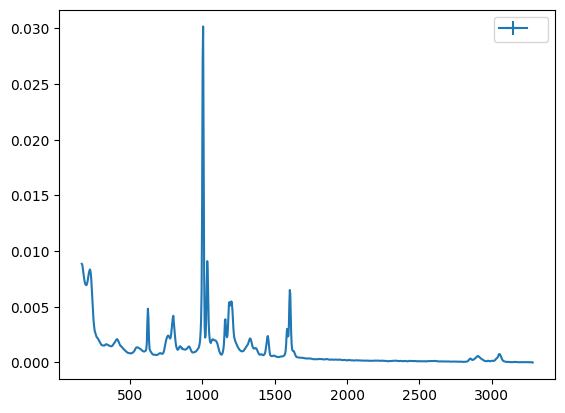

In [2]:
prefix = '/data/RamanSpe/FNMT-Madrid/Horiba_785nm/PST/'
spe = rc2.spectrum.from_local_file(prefix + 'PST10_iR785_OP01_8000msx8.txt', filetype='txt')
spe = spe.normalize('unity')
spe.plot()

In [23]:
cand = sharpened.find_peaks_bayesian_gaussian(n_samples=3000000,
                                        n_components=30,
                                        max_iter=10000,
                                        moving_minimum_window=10,
                                        trim_range=[900, 1500],
                                       )

(880.0, 1550.0)

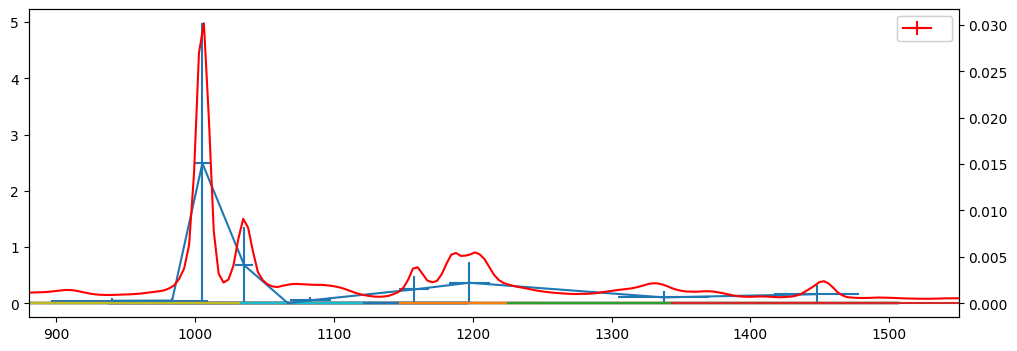

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))

cand.plot(ax=ax)
spe.plot(ax=ax.twinx(),fmt='r')
#spe.subtract_moving_minimum(10).plot(ax=ax.twinx(),fmt='g')
ax.set_xlim(880, 1550)


(-0.1, 0.5)

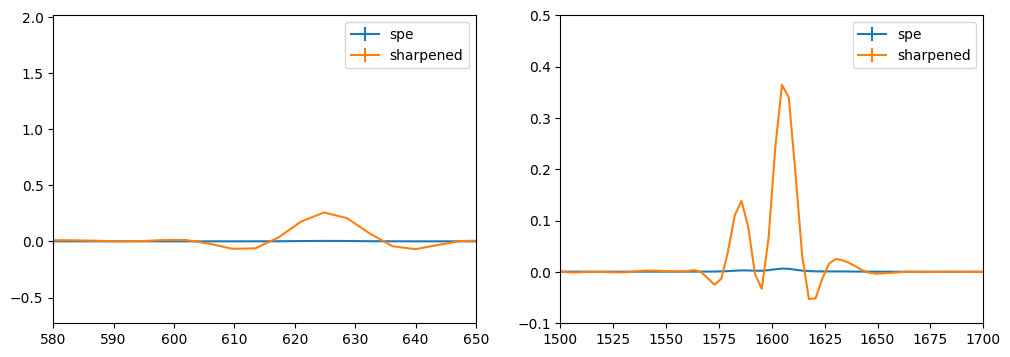

In [19]:
kw_sharpening = dict(filter_fraction=1, sig_width=.4, der2_factor=1, der4_factor=.1)
#kw_sharpening = dict(filter_fraction=.6, sig_width=.5, der2_factor=1, der4_factor=.1)
sharpened = spe.subtract_moving_minimum(60).normalize().derivative_sharpening(**kw_sharpening)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for a in ax:
    spe.plot(ax=a, label='spe')
    sharpened.plot(ax=a, label='sharpened')
ax[0].set_xlim(580, 650)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .5)

(-0.1, 0.5)

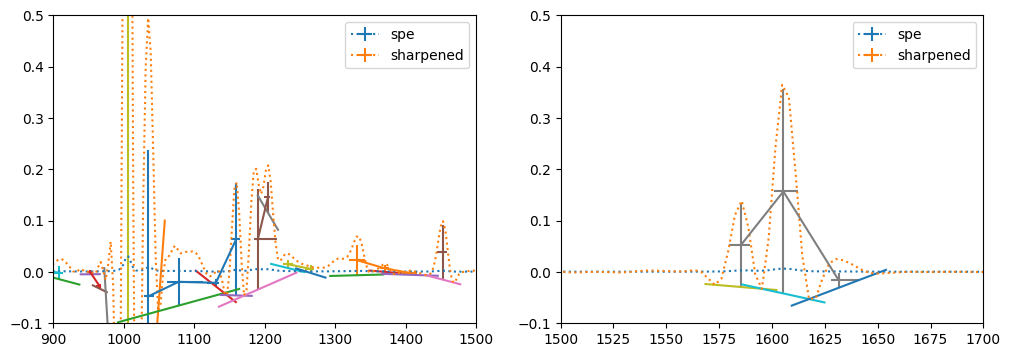

In [20]:
peak_candidates = spe.find_peak_groups(
    prominence=.005,
    wlen=40,
    width=1,
    n_sigma_group=3,
    moving_minimum_window=40,
    kw_derivative_sharpening=kw_sharpening)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for a in ax:
    spe.plot(ax=a, fmt=':', label='spe')
    sharpened.plot(ax=a, fmt=':', label='sharpened')
    peak_candidates.plot(ax=a, label=None)



ax[0].set_xlim(900, 1500)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .5)
ax[0].set_ylim(-.1, .5)


(-0.1, 0.1)

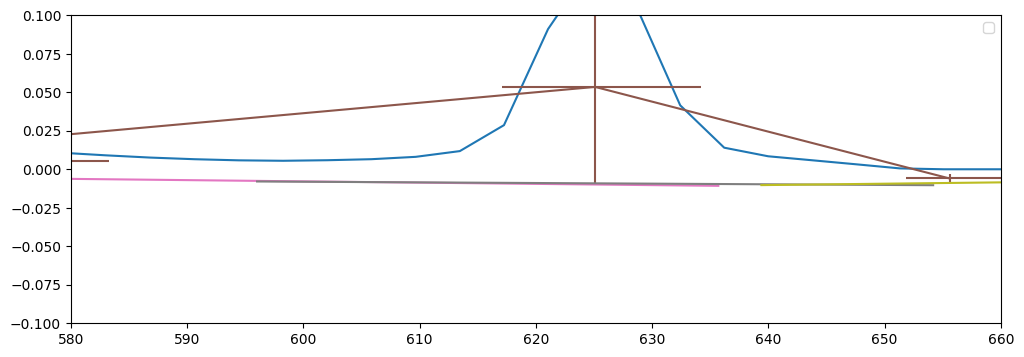

In [51]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 4))

ax.plot(spe.x, spe.subtract_moving_minimum(40).y)
peak_candidates.plot(ax=ax)
ax.legend('')
ax.set_xlim(580, 660)
ax.set_ylim(-.1, .1)

In [52]:
for i, p in enumerate(peak_candidates):
    print(i)
    mod, par = rc2.spectrum.peaks.fit_peaks.build_model_params(spe, 'Gaussian', baseline_model='linear', peak_candidates=p)
    mod.fit(spe.y, x=spe.x, params=par)

0
1
2
3
4
5
6
7
8
9
10


(-0.1, 0.1)

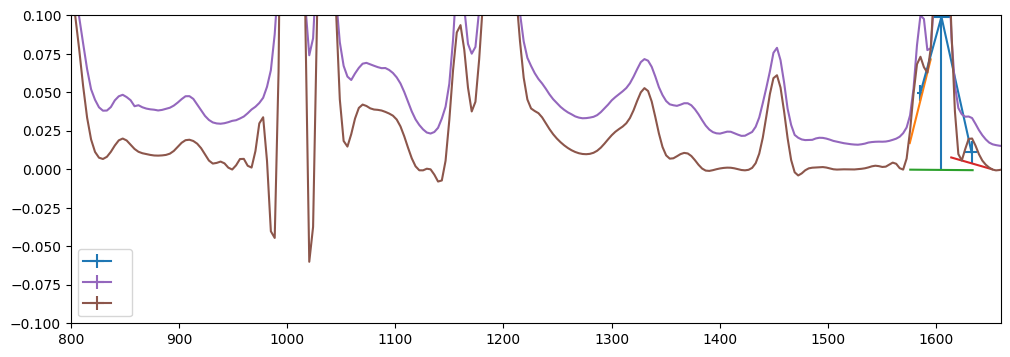

In [56]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 4))

peak_candidates[8].plot(ax=ax)
spe.plot(ax=ax)
sharpened.plot(ax=ax)
ax.set_xlim(800, 1660)
ax.set_ylim(-.1, .1)

In [20]:
fit_res.append(rc2.spectrum.peaks.fit_peaks.fit_peaks_model(spe,
                                   peak_candidates=peak_candidates[8],
                                   model='Voigt',
                                   baseline_model='linear',
                                   n_sigma_trim=5,
                                   kwargs_fit={},
                                   no_fit=False,
                                   ))


NameError: name 'fit_res' is not defined

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


<AxesSubplot:>

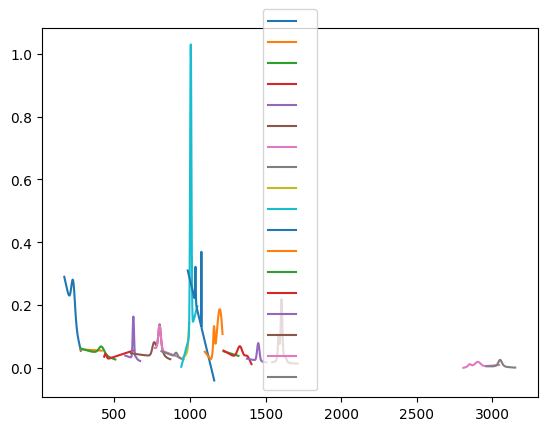

In [104]:
fit_res = rc2.spectrum.peaks.fit_peaks.FitPeaksResult()
for i, group in enumerate(peak_candidates[0:]):
    print(i)
    fit_res.append(rc2.spectrum.peaks.fit_peaks.fit_peaks_model(spe,
                                   peak_candidates=group,
                                   model='Voigt',
                                   baseline_model='linear',
                                   n_sigma_trim=10,
                                   kwargs_fit={},
                                   no_fit=False,
                                   ))
fit_res.plot()

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for a in ax:
    spe.plot(ax=a, fmt=':', label='spe')
    fit_res.plot(ax=a, label=None)
    #fit_res.plot(ax=a, label=None, individual_peaks=True)

ax[0].set_xlim(900, 1300)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .4)

In [ ]:

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for a in ax:
    spe.plot(ax=a, fmt=':', label='spe')
    #fit_res.plot(ax=a, label=None)
    fit_res.plot(ax=a, label=None, individual_peaks=True)

ax[0].set_xlim(900, 1300)
ax[1].set_xlim(1500, 1700)
ax[1].set_ylim(-.1, .4)

In [ ]:
fit_res.to_csv('/tmp/fit_res.csv')